# **Data analysis and prediction on Lesson dataset**

In this notebook, we focus on  [Lesson dataset](https://elearning.szu.edu.cn/bbcswebdav/pid-627077-dt-content-rid-5378037_1/xid-5378037_1) and do the following tasks:


1.   Load Lesson from download
2.   Analyze the dataset
3.   Train a linear perceptron neural network and predict the type of flower

### About Lesson Dataset
x1 : ID	

x2 : 性别	1:男，2：女

x3 : 你的研究方向是什么？（1：间接相关；2：直接相关）	

x4 : 你的研究与机器学习什么方向有结合？（1：暂无结合；2：有结合）	

x5 : 你怎么评估自己的数学基础？（5分为最好）

x6 : 你是否有做过机器学习相关的实验？	

x7 : 评价下自己对机器学习的兴趣程度。（5分为非常感兴趣）

x8 : 是否学习过机器学习相关课程（包括网上自学）？	1：是 2：否

x9 : 评估下毕业后从事机器学习相关工作的可能性。（5分可能性最高）	

x10: 学习机器学习这门课的主要目的是什么？（1：兴趣；2：科研；3：学分）

x11: 是否与两位任课老师有科研合作？	1：是 2：否

x12: 评价下目前为止课程难度（5分为最难）

y  : 到课情况 1：点过，到课；-1 点过，至少一次缺席； 0： 未点过。

### Import libraries
The following libraries are needed for the goal:


*   numpy (getting input and output of network with numpy array)
*   pandas (calculating data with pandas dataframe)
*   matplotlib (showing figures)
*   seaborn (using charts)
*   torch (using neural network and its functions)




In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

import torch
import torch.nn as nn


### **Load Lesson**
At first, load Lesson dataset from lesson.csv. It contains features as x1 to x11, y as target.

In the second step, data and target are concatenated and generate the dataframe. 

In the third step, a column called *id* is added to the dataframe, evaluated with *df.index*. This column will be used in neural network for generating train and test dataset.

At the end, we have a dataset with 161 rows and 13 columns.

It is clear that there are 11 features of data containing x1 to x11. There are also 3 types of y means come to class and don't come to class shown as 0 and 1 in database respectively.


In [2]:
# 读取lesson.csv文件
df = pd.read_csv("lesson.csv")
# print(lesson)

X = df.iloc[1:, 1:12]
# print(X)
# print(X[0])

Y = df.iloc[1:, -1:]
# print(Y)

'''
names = iris['target_names']
feature_names = iris['feature_names']
'''
# x1只是标识id，没有太大意义
df['id'] = df.index
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,y,id
0,1,1,2,3,1,4,1,3,2,1,3,1,0
1,1,2,2,3,1,4,1,4,2,2,3,1,1
2,2,2,2,3,1,3,1,3,1,2,3,1,2
3,2,1,2,2,1,4,1,2,1,2,3,1,3
4,1,1,2,2,1,4,1,4,1,1,4,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1,1,2,3,2,3,1,2,3,2,3,1,156
157,1,1,2,4,1,4,1,3,2,2,3,1,157
158,1,1,2,3,1,4,1,3,2,1,3,0,158
159,1,2,2,4,2,1,2,1,2,2,1,0,159


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x1      161 non-null    int64
 1   x2      161 non-null    int64
 2   x3      161 non-null    int64
 3   x4      161 non-null    int64
 4   x5      161 non-null    int64
 5   x6      161 non-null    int64
 6   x7      161 non-null    int64
 7   x8      161 non-null    int64
 8   x9      161 non-null    int64
 9   x10     161 non-null    int64
 10  x11     161 non-null    int64
 11  y       161 non-null    int64
 12  id      161 non-null    int64
dtypes: int64(13)
memory usage: 16.5 KB


### **Data analysis**
The following figure will show us a clear picture of dataset. We categorized the flower type based on different features of flowers. As you may notice, flowers are classified very well in all cases. There is only one exception. In the case of sepal length and sepal width, versicolor and virginica are not separeted very well. 

The figure guided us, this can be a good classification task. If we build a suitable neural network, we may get good results.

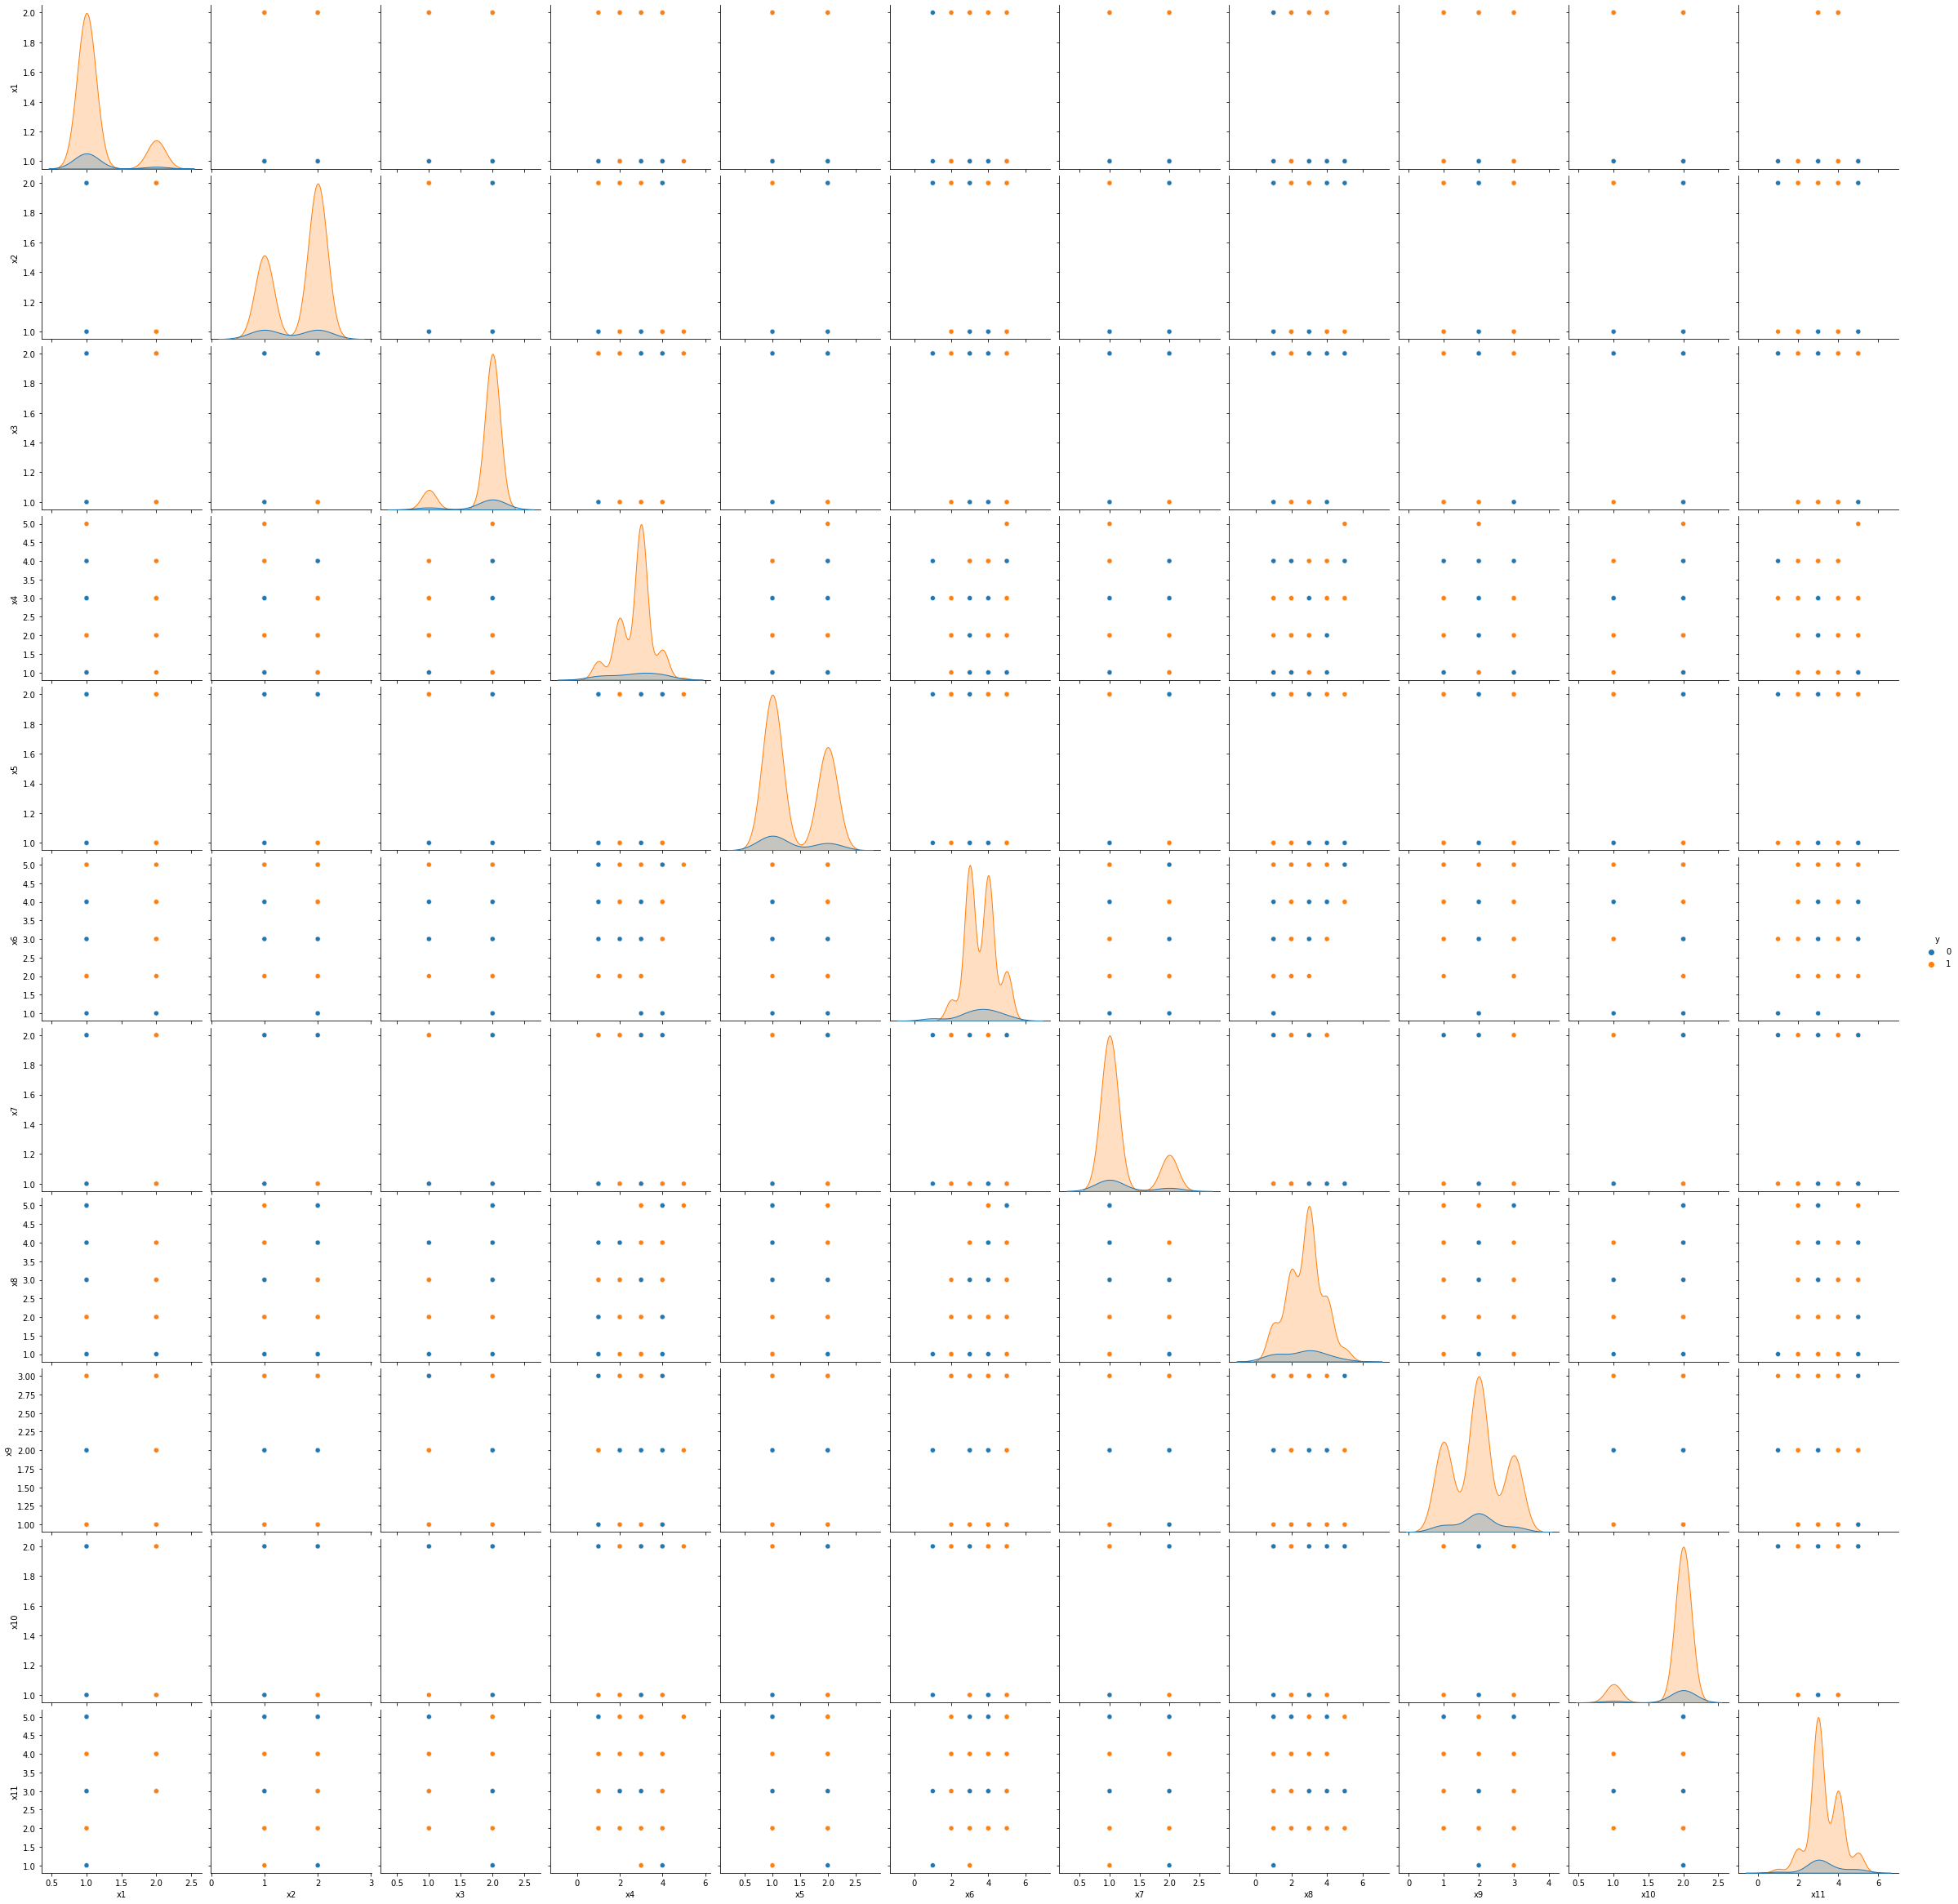

In [4]:
df_copy = df.copy()
df_copy.drop('id', inplace=True, axis=1)
sns.pairplot(df_copy, hue='y', height=3, palette = sns.color_palette("tab10",n_colors=2));

From the next figure, we can find out that we have 50 samples of each flower type. It explains that we should choose 2 equal subsets of data (according to flower type) for our neural network training data set.

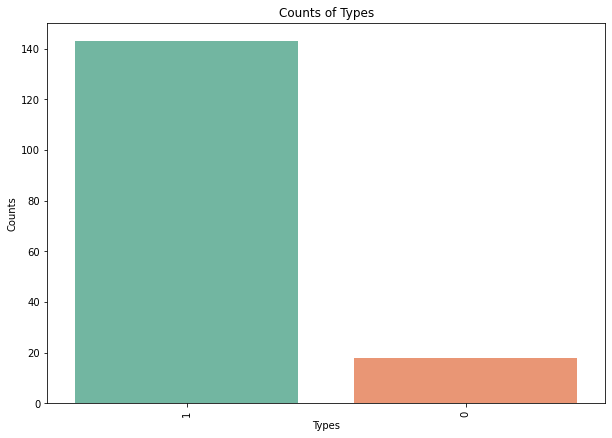

In [5]:
plt.figure(figsize= (10, 7))
sns.countplot(x = "y", data = df, palette = sns.color_palette("Set2", 18)
      , order=df['y'].value_counts().index)
plt.xlabel("Types")
plt.ylabel("Counts")
plt.title("Counts of Types")
plt.xticks(rotation = "vertical")
plt.show()

### **Neural network**
In this section, a neural network with the following structure will be built. 


*   A three layer neural network.
*   Input layer has 11 neurons.
*   There is 1 hidden layer with 16 neurons.
*   Output layer has 2 nodes.
*   Train data contains 129 records.
*   Test(validation) data contains 32 samples, selected randomly.


### Train and Test data selection
As we saw before, there are 3 equal groups of data for each flower type, so we should build our train and test dataset in this order. The size of train and test datasets are 129and 32 respectively. At first, we need to get 10 random samples from each flower type for test dataset. By removing the test dataset from the whole data, train dataset is obtained. We use *id* column for this purpose. At the end, by separating datasets into features and target we will have 4 datasets:

*   train_data_x (input of NN for train dataset)
*   train_data_y (actural output of train dataset)
*   test_data_x  (input of NN for test dataset)
*   test_data_y  (actual output of test dataset)




In [6]:
df_copy = df.copy()

# Get 10 random samples for test
test0 = df_copy.loc[df['y'] == 1].sample(28)
test1 = df_copy.loc[df['y'] == 0].sample(4)

# Create test and train data
test_data_temp = test0.append(test1)
train_data_temp = df.copy()

# Remove test data from data and generate train data
cond = train_data_temp['id'].isin(test_data_temp['id'])
train_data_temp.drop(train_data_temp[cond].index, inplace = True)

# Convert test and train into numbers
train_data = train_data_temp.to_numpy()
test_data = test_data_temp.to_numpy()

train_data_x = train_data[:,:-2]
train_data_y = train_data[:, -2]
# print(train_data_x)
# print(train_data_y)

test_data_x = test_data[:,:-2]
test_data_y = test_data[:, -2]
# print(test_data_x)
# print(test_data_y)

In [7]:
# To generate the same random numbers in all runs 
# torch.manual_seed(1234)

Now we should set the NN parameters. The parameters contain:


*   Input layer nodes
*   Output layer nodes
*   Hidden layer nodes
*   Learning rate
*   Number of epochs



In [8]:
# Input layer
input_layer = 11
# Output layer
output_layer = 2
# Numbers of hidden layer nodes
hidden_layer = 20
# Learning rate
lr = 0.01
# Iteration/epoch number
num_epoch = 200

Then we can build our model. It contains 2 [linear NN](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) with [Sigmoid activation function](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html?highlight=sigmoid#torch.nn.Sigmoid). Due to the multi classification task we have, [CrossEntropyLoss](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) seems essential for loss function and thanks to the light weight dataset, we can use [Stochastic Gradient Descent](https://pytorch.org/docs/stable/optim.html) as optimizer.

In [9]:
# Build model
model = torch.nn.Sequential(
        torch.nn.Linear(input_layer, hidden_layer),
        torch.nn.Sigmoid(),
        torch.nn.Linear(hidden_layer, output_layer)
)

# Loss function and optimize
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

In a for loop, neural network is feeded by train dataset and is tested by test data. In every 50 loops, loss and accuracy values are calculated and printed. We can trace those values to explain the behavior of our network.

In [10]:
for each in range(num_epoch):
  # Convert data to tensor
  X = torch.Tensor(train_data_x).float()
  Y = torch.Tensor(train_data_y).long()

  Xt = torch.Tensor(test_data_x).float()
  Yt = torch.Tensor(test_data_y).long()

  # Clear gradiant tensor
  optimizer.zero_grad()
  y_pred = model(X)
  loss = loss_func(y_pred, Y)

  loss.backward()
  optimizer.step() 

  if each % 50 == 0  or each == num_epoch - 1:
      test_out = model(Xt)
      predicted = torch.max(test_out.data, 1)

      #get accuration
      print('Epoch {:03d}:'.format(each+1), 'Loss = {:.3f}'.format(loss.item()),
            '| Accuracy = {:.2f}'
                .format((100 * torch.sum(Yt == predicted.indices) / 30).item())
          )  

Epoch 001: Loss = 0.455 | Accuracy = 93.33
Epoch 051: Loss = 0.355 | Accuracy = 93.33
Epoch 101: Loss = 0.347 | Accuracy = 93.33
Epoch 151: Loss = 0.346 | Accuracy = 93.33
Epoch 200: Loss = 0.346 | Accuracy = 93.33


**As nutshell**, best average best accuracy obtained in *100* runs with different test dataset is *93.33*.
As you may noticed in data analysis section, due to dataset shape, it seems that clustering methods (like [K-means](https://en.wikipedia.org/wiki/K-means_clustering)) may also work well on Iris dataset.